In [18]:
import pandas as pd# Loading the data
df=pd.read_csv("Products.csv")
df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [3]:
df1=pd.read_csv("Transactions.csv")
df1.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [4]:
df2=pd.read_csv("Customers.csv")
df2.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [19]:
df.isnull().sum()#Check for missing values

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [16]:
df1.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [19]:
df2.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

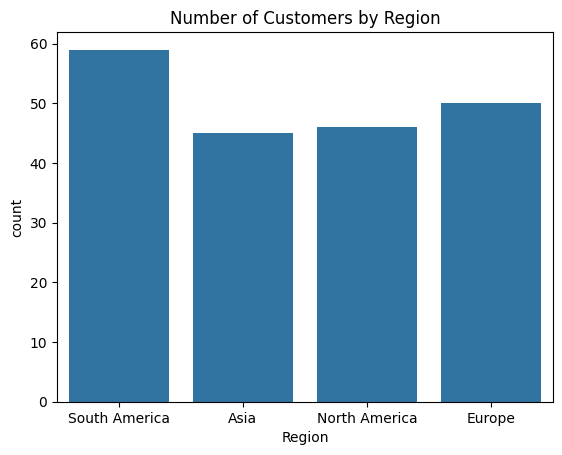

In [20]:
import matplotlib.pyplot as plt#Distribution of customers by region
import seaborn as sns

sns.countplot(data=df2, x='Region')
plt.title('Number of Customers by Region')
plt.show()


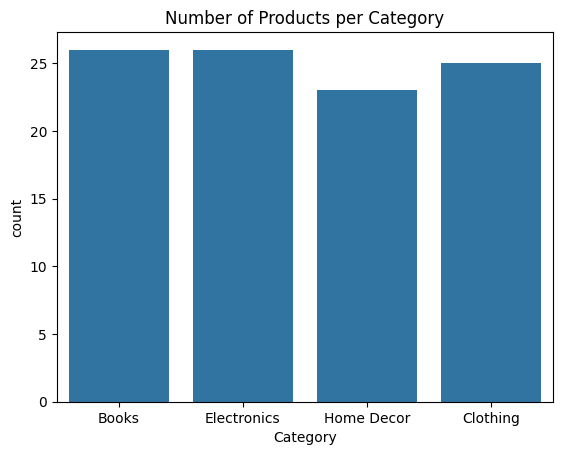

In [21]:
sns.countplot(data=df, x='Category')#Product distribution by category
plt.title('Number of Products per Category')
plt.show()

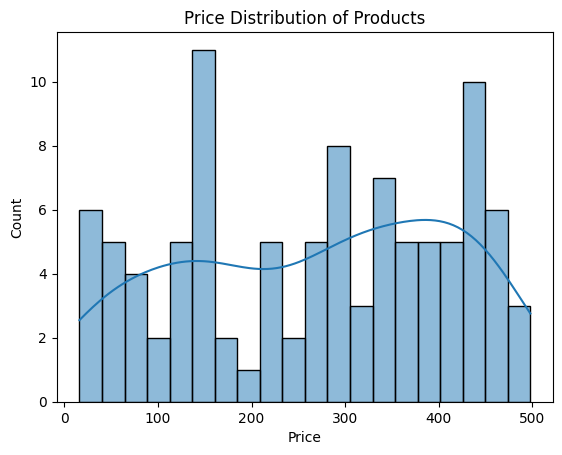

In [22]:
sns.histplot(df['Price'], bins=20, kde=True)#Product price distribution
plt.title('Price Distribution of Products')
plt.show()

In [25]:
# Total sales by product category
sales_by_category = df1.merge(df[['ProductID', 'Category']], on='ProductID')
category_sales = sales_by_category.groupby('Category').agg(
    total_sales=('TotalValue', 'sum')
).sort_values('total_sales', ascending=False)

print(category_sales)

             total_sales
Category                
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93


In [16]:
df1['TransactionDate'] = pd.to_datetime(df1['TransactionDate'])
df2['SignupDate'] = pd.to_datetime(df2['SignupDate'])
df1.dropna(subset=['CustomerID', 'ProductID', 'TotalValue'], inplace=True)

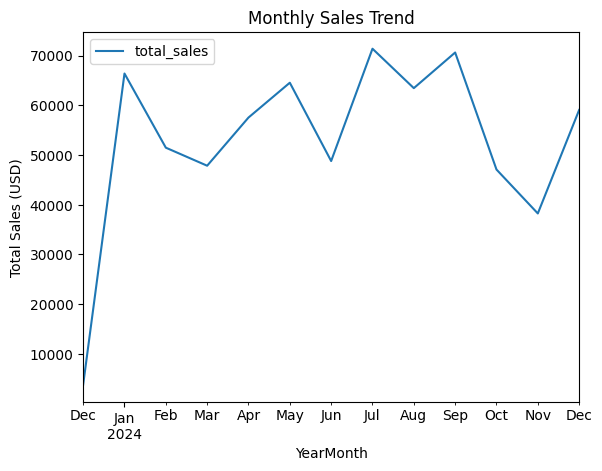

In [23]:
df1['YearMonth'] = df1['TransactionDate'].dt.to_period('M')#Total transaction value over time
monthly_sales = df1.groupby('YearMonth').agg(total_sales=('TotalValue', 'sum'))
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.ylabel('Total Sales (USD)')
plt.show()
